In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("churn.csv")

In [3]:
df.drop(["customerID","PhoneService"],axis=1,inplace=True)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.columns = df.columns.str.strip()

In [7]:
le = LabelEncoder()


binary_cols = ['gender', 'Partner', 'Dependents',   'Churn','PaperlessBilling']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [8]:
multi_cols = ['InternetService', 'Contract', 'PaymentMethod','MultipleLines','OnlineSecurity','DeviceProtection','OnlineBackup','TechSupport','StreamingTV' , 'StreamingMovies']
df = pd.get_dummies(df, columns=multi_cols, drop_first=True,dtype=int)


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0) 


In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,...,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,1,29.85,29.85,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,34,0,56.95,1889.50,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,2,1,53.85,108.15,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,45,0,42.30,1840.75,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,70.70,151.65,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,84.80,1990.50,0,0,...,0,1,0,0,0,1,0,1,0,1
7039,0,0,1,1,72,1,103.20,7362.90,0,1,...,0,1,0,1,0,0,0,1,0,1
7040,0,0,1,1,11,1,29.60,346.45,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,1,1,0,4,1,74.40,306.60,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)
  

In [13]:
model=DecisionTreeClassifier(
    max_depth=5,
    criterion='gini',
    splitter='best',
    random_state=42,
    class_weight=None,
    min_samples_split=10,
    min_samples_leaf=5
   

)
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
y_proba_dt=model.predict_proba(X_test)[:,1]
y_predt_dt = (y_proba_dt >= 0.4).astype(int) 

accuracy_score(y_test,y_predt_dt)

0.794180269694819

In [18]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predt_dt)

0.5941043083900227

In [19]:

recall = recall_score(y_test, y_predt_dt)
f1 = f1_score(y_test, y_predt_dt)

In [20]:


print(classification_report(y_test, y_predt_dt))


              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1036
           1       0.59      0.70      0.64       373

    accuracy                           0.79      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.79      0.80      1409



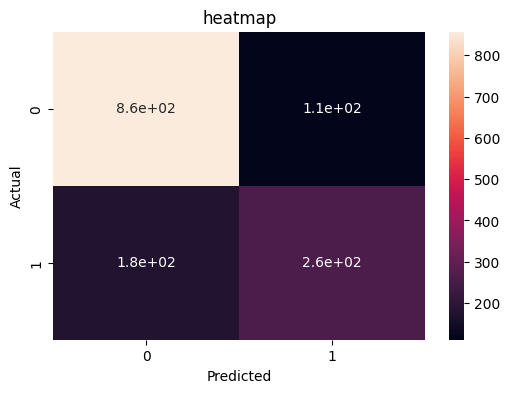

In [21]:
cm=confusion_matrix(y_predt_dt,y_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("heatmap")
plt.show()


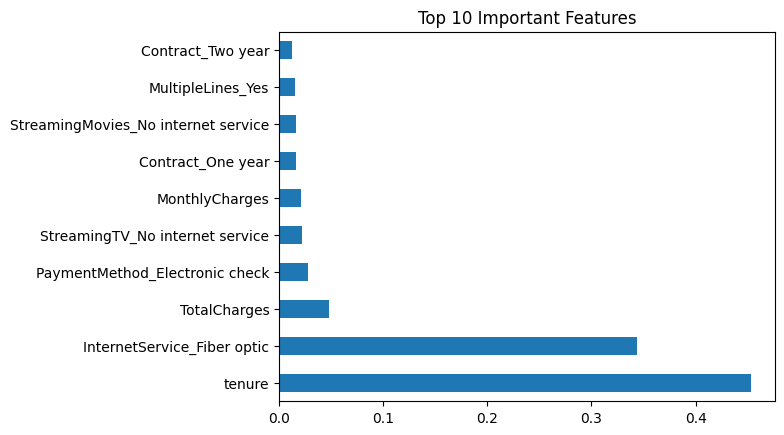

In [22]:


importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


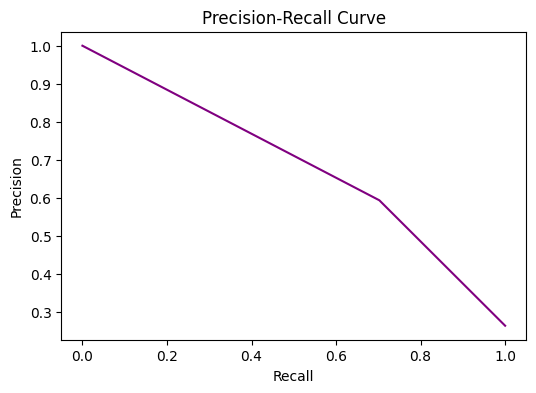

In [23]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresh = precision_recall_curve(y_test, y_predt_dt)

plt.figure(figsize=(6,4))
plt.plot(rec, prec, color="purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [25]:
lr.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_proba_lr=lr.predict_proba(X_test)[:,1]
y_predt_lr = (y_proba_lr >= 0.4).astype(int) 

accuracy_score(y_test,y_predt_lr)

0.8069552874378992

In [28]:

print(classification_report(y_test, y_predt_lr))


              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1036
           1       0.62      0.69      0.65       373

    accuracy                           0.81      1409
   macro avg       0.75      0.77      0.76      1409
weighted avg       0.81      0.81      0.81      1409

